 ## <font color=yellow> - Torch 

In [4]:
import torch
from torch.utils.data import Dataset, DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor # given the dataset we have to provide it as a tensor that data to the neural network
from matplotlib import pyplot as plt
from torch import nn
import torchmetrics 
import cv2 

#### - Test PyTorch

In [41]:
# HOW TO CHECK IF PYTORCH IS WORKING 
x = torch.rand(3,2)
print(x)

# this is for check if we can use the GPU acceleration 
print(torch.cuda.is_available())

tensor([[0.4073, 0.4533],
        [0.0583, 0.3606],
        [0.6307, 0.2828]])
False


In [42]:
data = [[1,2],[3,4]]
pyt_data = torch.tensor(data) 
#@ the following works for if we have a numpy array : torch.from_numpy(data)
print(data, pyt_data)

[[1, 2], [3, 4]] tensor([[1, 2],
        [3, 4]])


#### - Import the data needed 

In [6]:
# import training ans testing data 
batch_size = 64
training_data = datasets.FashionMNIST(root="data", train=True, download=True, transform=ToTensor())
    #@ root: store the dataset in a folder 
    #@ transform: transform the data set to a tensor 
test_data = datasets.FashionMNIST(root="data", train=False, download=True, transform=ToTensor())

100%|██████████| 26421880/26421880 [00:03<00:00, 6734942.45it/s]


Extracting data/FashionMNIST/raw/train-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 29515/29515 [00:00<00:00, 968365.54it/s]


Extracting data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 4422102/4422102 [00:00<00:00, 7339795.06it/s]


Extracting data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 5148/5148 [00:00<00:00, 12867864.72it/s]

Extracting data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to data/FashionMNIST/raw



#### - We show how the dataset is compose  

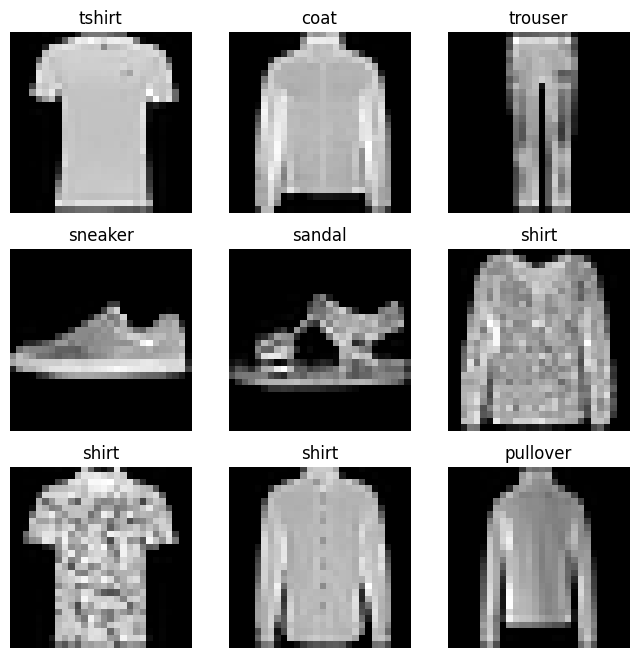

In [43]:
# labels of the dataset 
labels_map = {0:"tshirt",1:"trouser",2:"pullover",3:"dress",4:"coat",5:"sandal",6:"shirt",7:"sneaker",8:"bag",9:"ankle boot"}

figure = plt.figure(figsize=(8,8))
cols, rows = 3,3
for i in range(1, cols*rows + 1):
    sample_idx = torch.randint(len(training_data),size=(1,)).item()
        #@ item(): is a method of the tensor in pytorch, it can be use just when there is a single element in it 
        #@ size(1,): will return a tensor of shape 1D containing a single element 
    img, label = training_data[sample_idx]
        #@ img.shape: tensor(1,28,28)
    figure.add_subplot(rows,cols,i)
    plt.title(labels_map[label])
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap="gray")
        #@ .squeeze(): remove all the chanels of a tensor that are equal to 1 




#### - Creation of a Model using MLP

In [44]:
# create the model 
device = ("cuda" if torch.cuda.is_available() else "cpu")


class ourMLP(nn.Module): 
    def __init__(self):
        super().__init__()
        self.mlp = nn.Sequential(
            nn.Linear(28*28,20),
            nn.Sigmoid(),
            nn.Linear(20,50),
            nn.Sigmoid(),
            nn.Linear(50,10) # tensor of 1xn, and it will contain the probability that the sample belongs to each class
        ) 
        #@ self.mlp: is called the instance variable of the subclass of nn.Module, and is initialize with an object 
        
        self.flatten = nn.Flatten() # multi dimensional input and onver to one dimension output 

    def forward(self,x):
        x= self.flatten(x)
        logits = self.mlp(x)
        return logits
#@ nn: is a module of pytorch and the nn.Module is a class of the module nn 
#@ we extend the class nn.Module, this subclass will be a custume model in PyTorch

#### -Check if the Model works 

In [45]:
# model initialization 
model = ourMLP().to(device)

# check if everything works 
X = torch.rand(1,28,28)
prediction = model(X)
print(f"prediction:\n{prediction}\n")
probability = nn.Softmax(dim=1)(prediction)
print(f"probability:\n{probability}\n")
y = probability.argmax(1) 
    #@ armax(1): it will return the index of the highest value in the 1 dimension for each row. furthermore given that 
    #@ the probability tensor has a shape of 1x10 it will return a 1D tensor of shape (1,) but in the other hand if 
    #@ the tensor has a shape of 2X10 it will return a 1D tensor of shape (2,) so it has 2 elemnts inside 
print(y)

prediction:
tensor([[-0.1233, -0.2367,  0.2190,  0.0582,  0.2623,  0.0163, -0.1930, -0.2578,
          0.2441,  0.0279]], grad_fn=<AddmmBackward0>)

probability:
tensor([[0.0867, 0.0774, 0.1221, 0.1039, 0.1275, 0.0997, 0.0809, 0.0758, 0.1252,
         0.1008]], grad_fn=<SoftmaxBackward0>)

tensor([4])


In [39]:
from torch.utils.data import DataLoader, TensorDataset
import torch

# Create a dummy dataset
X = torch.randn(100, 3)
y = torch.randint(0, 2, (100,))
print(y)
dataset = TensorDataset(X, y)

# Create a DataLoader for the dataset
dataloader = DataLoader(dataset, batch_size=10)

# Iterate over the data in the DataLoader
for batch, (X,y) in enumerate(dataloader):
    print(f"Batch: {batch}")
    print(f"X shape: {X.shape}")
    print(f"y shape: {y.shape}")


tensor([0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1,
        0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1,
        1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0,
        1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
        1, 0, 1, 1])


#### - Training the Model 

In [50]:
# define the hyperparameters 
epochs = 3 # how many times our model should analize the dataset
batch_size = 64 # how many samples will be analize at the same time 
learning_rate = 0.001 # amount of change we allow 

# define the loss function 
loss_fn = nn.CrossEntropyLoss() # it takes the logits and apply the softmax to convert the predictions in probabilities 

# define the optimazer  (mathematical approache that we will use to compute the gradient) it compute the gradient 
optimazer = torch.optim.SGD(model.parameters(),lr= learning_rate)
    #@ maodel.parameter(): will be the weights and bias of the model that it will modify 

# testing loop
def test_loop(dataloader, model, loss_fn):
    # we dont need the optimazer because is only using during the training, so we don't need to modify the weights 
    size = len(dataloader)
    num_batches = len(dataloader) # we have the accurancy for this specific batche 
    test_loss, correct = 0,0 

    # disable weight update
    # using the model without chaning the weights 
    with torch.no_grad():
        for X,y in dataloader:
            pred = model(X)
            y_tensor = torch.tensor([y])
            test_loss += loss_fn(pred,y_tensor).item() # we compared the prediction w.r.t the true labels 
            correct += (pred.argmax(1) == y_tensor).type(torch.float).sum().item()
                # counts the number of correct clasification doing for the model 
                # if we don't put the "pred.argmax(1) == y_tensor" we are just summing up the indexes and not the 
                # correct predictions , doing so we are getting a tensor of shape (batch_size,)
                # having 0 and 1 and then it really will counts the number of correct prediction 
            
            # print the accuancy and the average loss
            test_loss = test_loss / num_batches # we have to up date the accurancy and the loss  for this batche we are looking 
            correct = correct / size
            print(f"Accuracy: {correct * 100} , Average Loss: {test_loss}")






# define the training loop 
def train_loop(dataloader, model, loss_fn, optimazer):
    #@ the dataloader is an iterable that containts the samples with the labels
    size = len(dataloader)
    # get the batch from the dataset
    for batch, (X,y) in enumerate(dataloader):
        # compute prediction and loss
        pred = model(X) # prediction do for the model 
        y_tensor = torch.tensor([y])
        loss = loss_fn(pred,y_tensor) # compared the prediction values and the ground truth value given by the dataset

        # backpropagation
        loss.backward() #  get the error and spread the error through the network
        optimazer.step() # compute the gradient 
        optimazer.zero_grad() # clead the gradient ,the previous gradient will sum up with the current gradient 

        # print loss during training 
        if batch % 1000 == 0:
            loss, current = loss.item(), (batch + 1) * len(X)
            print(f"loss: {loss}, [{current} / {size}]")


# train the model 
for t in range(epochs):
    print(f"Epoch: {t}")
    train_loop(training_data, model, loss_fn, optimazer)
    test_loop(test_data, model, loss_fn)

print("Done bitch")

Epoch: 0
loss: 0.27847084403038025, [1 / 60000]
loss: 0.34820929169654846, [1001 / 60000]
loss: 1.1876884698867798, [2001 / 60000]
loss: 1.2783268690109253, [3001 / 60000]
loss: 0.12466675043106079, [4001 / 60000]
loss: 1.1280311346054077, [5001 / 60000]
loss: 2.3865838050842285, [6001 / 60000]
loss: 0.24100467562675476, [7001 / 60000]
loss: 0.820318877696991, [8001 / 60000]
loss: 0.754628598690033, [9001 / 60000]
loss: 0.1627454161643982, [10001 / 60000]
loss: 0.12088549882173538, [11001 / 60000]
loss: 1.2698235511779785, [12001 / 60000]
loss: 0.2631283402442932, [13001 / 60000]
loss: 0.790744423866272, [14001 / 60000]
loss: 0.989697277545929, [15001 / 60000]
loss: 0.9581524729728699, [16001 / 60000]
loss: 0.699468731880188, [17001 / 60000]
loss: 1.823075532913208, [18001 / 60000]
loss: 0.4388759136199951, [19001 / 60000]
loss: 0.1587788611650467, [20001 / 60000]
loss: 0.4152672588825226, [21001 / 60000]
loss: 0.4502899944782257, [22001 / 60000]
loss: 2.0302765369415283, [23001 / 6000

#### - fix error in test_loop

In [51]:
import torch

# Create some dummy data
batch_size = 5
num_classes = 3
y_true = torch.tensor([0, 1, 2, 0, 1])
y_pred = torch.tensor([[0.8, 0.1, 0.1], [0.2, 0.7, 0.1], [0.1, 0.2, 0.7], [0.6, 0.2, 0.2], [0.3, 0.4, 0.3]])

# Compute the predicted classes
predicted_classes = y_pred.argmax(1)
print(f"Predicted classes: {predicted_classes}")

# Compute the number of correct predictions
correct_predictions = (predicted_classes == y_true).type(torch.float) # we are comparing to the true lable 
print(f"Correct predictions: {correct_predictions}")

# Count the number of correct predictions
num_correct = correct_predictions.sum().item()
print(f"Number of correct predictions: {num_correct}")

Predicted classes: tensor([0, 1, 2, 0, 1])
Correct predictions: tensor([0., 1., 2., 0., 1.])
Number of correct predictions: 4.0


#### - Personal Dataloader

In [ ]:
import os 
import pandas as pd 
from torchvision import read_image
from torch.utils.data import Dataset

class MydatasetLoader (Dataset): # extecd dataset class
    def __init__(self, labels, img_dir, transform=None): 
        self.img_dir = img_dir 
        self.transform = transform
            # we set the root where the data is, the transformation that was made to the data 
        self.labels = pd.read_csv(labels) 
            #@ it is a Dataframe object of pandas that we could access to the elements through a index. 
            #@ pd.read_cv: is a function of the pandas library to read data from the comma-separated-value (CSV) files 
            #@ in to a Dataframe object 

    def __len__(self):
        # return the len of the dataset 
        return len(self.labels)
        
    def __getitem__(self, index):
        # (comment)function that allow us to download the data from the disk 

        # create the image path; e.g imgdir = "data\"
        imgs_path = os.join(self.img_dir, self.labels.iloc[index, 0])
            #@ labels.iloc[index, 0]: the .iloc is a property of the Dataframe object that allos us to access to the 
            #@ data in a specific location starting from the rows (index) and the for the columns (0)
            # getitem will load one sample at time 
        image = read_image(imgs_path)

        # read the label
        label = self.label.iloc[index,1]
            #@ iloc is a method of pandas index location, we can specify the row and the column for a cell in the table 

        # apply transformations, this happend only we pass as argument some transformation we wanna apply to the image 
        if self.transform:
            image = self.transform(image)
            #@  The transforms module provides a set of common image transformations that can be used to preprocess and
            #@  augment image data when training a neural network or creating a custom data loader.

        return image, label

#### - Image Folder 

In [ ]:
from torchvision.datasets import ImageFolder
""""

root\dog\1.png
root\dog\2.png
...
root\bird\1.png
root\bird\2.png
...

"""

## <font color = "yellow" > Convolutional Neural Network 

the shape of a tensor (B,C,W,H) (batch size (how many image we are passing), number of channels of the images, width, height)

#### - Theory 

A convolutional neural network (CNN), each convolutional layer applies a set of filters to its input to produce a set of feature maps. The number of feature maps produced by a convolutional layer is equal to the number of filters in that layer.

In your example, the first convolutional layer takes an image of size FxFx3 as input and applies 5 convolutional filters to it. This produces 5 feature maps, which are then stacked together to form a new image of size FxFx5. This new image is then passed as input to the second convolutional layer, which applies its own set of convolutional filters to produce another set of feature maps.

In general, the number of channels in the input to a convolutional layer is equal to the number of feature maps produced by the previous layer (or the number of channels in the original input image, for the first convolutional layer). The filters in each convolutional layer are applied to all channels of the input, and the resulting feature maps are combined to produce the output of the layer.

#### - Create a Model using CNN & MLP

In [57]:
# define our cnn 
class OurCNN(nn.Module):
    #% class OurCNN(nn.Module):
    #@ This line defines a new class called OurCNN that inherits from the nn.Module class

    #%def __init__(self):
    #@  This line defines the constructor for the OurCNN class. The constructor is a special method 
    #@ that is called when an object of the OurCNN class is created. It is used to initialize the object’s 
    #@ attributes and set up any required internal state.

    #% super().__init__():
    #@ if a subclass needs to perform additional initialization steps that are not performed 
    #@ by the parent class’s constructor, it can define its own constructor. In this case, the subclass’s constructor 
    #@ should call the parent class’s constructor using the super() function to ensure that any required initialization
    #@steps defined in the parent class are performed before any additional initialization steps defined in the subclass
    
    def __init__(self):
        super().__init__()
        self.cnn = nn.Sequential(
            nn.Conv2d(1, 5, 3), # (64,1,28,28): (number of images in the batch(64), # channels of the image (1), shape of the image 28x18 )
                #@ Conv2d: dimension of the input image is 2 dimension 
                #@ in CNN we don't care about the size of the image, we just put the how many channel there are so less parameters 
            nn.ReLU(), # activation function 
            nn.Conv2d(5,10,3), # (64,5,26,26)
            nn.ReLU() #@ we can pooling layer after the activation function or convolutional layer, be carful with the input of the following layer 
        ) # (64,10,24,24)
        self.mlp = nn.Sequential(
            nn.Linear(24*24*10,10),
            nn.ReLU(),
            nn.Linear(10,10) # row porbabilities of the target labels 
        )

    def forward(self,x):
        x = self.cnn(x)
        #print(x.shape)
        x = torch.flatten(x,1)
        #print(x.shape)
        x = self.mlp(x)
        return x 

#### - Train the Model 

In [58]:
##### TRAINING THE MODEL 

# define the hyperparameters 
epochs = 3 # how many times our model should analize the dataset
batch_size = 64 # how many samples we get from the dataset 
learning_rate = 0.001 # amount of change we allow 

# create the data loader 
train_dataloader = DataLoader(training_data,batch_size=batch_size)
test_dataloader = DataLoader(test_data,batch_size=batch_size)

# define the loss function 
loss_fn = nn.CrossEntropyLoss()

# define the optimazer  (mathematical approache that we will use to compute the gradient) it compute the gradient 
optimazer = torch.optim.SGD(model.parameters(),lr= learning_rate)
    #@ AdamW: another optimizer that convert early 

# create the accurancy matric
metric = torchmetrics.Accuracy(task="multiclass",num_classes = 10)


# define the training loop 
def train_loop(dataloader, model, loss_fn, optimazer):
    # get the batch from the dataset
    for batch, (X,y) in enumerate(dataloader):
        # compute prediction and loss
        pred = model(X) # prediction do for the model 
        #y_tensor = torch.tensor([y]) # given that the data is taking one sample at the time we have to convert to a tensor 
                                        # but when we are taking more samples at the time his step is not more needed 
        loss = loss_fn(pred,y) # compared the prediction values and the ground truth value given by the dataset

        # backpropagation
        loss.backward() #  get the error and spread the error through the network
        optimazer.step() # compute the gradient 
        optimazer.zero_grad() # clead the gradient ,the previous gradient will sum up with the current gradient 

        # print loss during training 
        if batch % 100 == 0:
            acc = metric(pred,y)
            print(f"Accuracy on current batch :{acc}")
            #@  The accuracy is calculated as the proportion of samples in the batch that were correctly classified by the model.
             

    # print the final training accurancy
    acc = metric.compute()
    print(f"Trainig Accurancy at the end of the epoch:{acc}")
    metric.reset()

# testing loop 
def test_loop(dataloader, model, loss_fn):
    
    # disable weight update
    with torch.no_grad():
        for X,y in dataloader:
            pred = model(X)
            acc = metric(pred,y)

    # print the accuracy for the epoch
    acc = metric.compute()
    print(f"Testing Accurancy at the end of the epoch:{acc}")
    metric.reset()

# train the model 
for t in range(epochs):
    print(f"Epoch: {t}")
    train_loop(train_dataloader, model, loss_fn, optimazer)
    test_loop(test_dataloader, model, loss_fn)

print("done bitch")

Epoch: 0
Accuracy on current batch :0.046875
Accuracy on current batch :0.09375
Accuracy on current batch :0.09375
Accuracy on current batch :0.140625
Accuracy on current batch :0.1875
Accuracy on current batch :0.15625
Accuracy on current batch :0.25
Accuracy on current batch :0.421875
Accuracy on current batch :0.375
Accuracy on current batch :0.515625
Trainig Accurancy at the end of the epoch:0.22812500596046448
Testing Accurancy at the end of the epoch:0.49059998989105225
Epoch: 1
Accuracy on current batch :0.421875
Accuracy on current batch :0.484375
Accuracy on current batch :0.609375
Accuracy on current batch :0.609375
Accuracy on current batch :0.59375
Accuracy on current batch :0.703125
Accuracy on current batch :0.671875
Accuracy on current batch :0.765625
Accuracy on current batch :0.734375
Accuracy on current batch :0.75
Trainig Accurancy at the end of the epoch:0.6343749761581421
Testing Accurancy at the end of the epoch:0.7203999757766724
Epoch: 2
Accuracy on current batc

## <font color= yellow> - CNN without Sequential Module 

#### - Create a Model 

In [ ]:
class OurCNN(nn.Module):
    def __init__(self):
        super().__init__()
        
        self.input_layer = nn.Conv2d(1, 5, 3)
        self.relu = nn.ReLU() 
        self.conv_1 = nn.Conv2d(5,10,3)
            #@ inside the init we have to declare all the layer we will use, and given that the ReLU is the same for all the layers which use
            #@ that layer we only declare it once
        self.max_pool = nn.MaxPool2d(2)
        self.input_linear = nn.Linear(12*12*10,10)
        self.output_linear = nn.Linear(10,10) 
        

    def forward(self,x):
        #@ here we have to specify each step our data will do 
        x = self.input_layer(x)
        x = self.relu(x)
        x = self.conv_1(x)
        x = self.relu(x)
        x = self.max_pool(x)
        
        #@ this to point so on we are using the MLP
        x = torch.flatten(x,1)
        x = self.input_linear(x)
        x = self.relu(x)
        x = self.output_linear(x)
   
        return x 

## <font color = yellow> - Recurent Neural Network RNN

## <font color=yellow> - Long-Short Term Memory (LSTM)